In [1]:
import numpy as np
import matplotlib.pyplot as plt
import unyt
import swiftsimio as sw
import h5py
from scipy.spatial.transform import Rotation as Ro
from pathlib import Path
from PIL import Image
#xray_lum offset>0.2:2.,  13.,  21.,  50.,  64.,  66.,  82., 105
path="/home/jyang/data/Flamingo/L0200N0360/halo_particles/"


f=h5py.File(path+'1.hdf5','r')

Coord_g=np.array(f['PartType1']["Coordinates"])

Coord_dm=f['PartType2']["Coordinates"]
xyz_dm=np.array(Coord_dm).T 
xyz_g=np.array(Coord_g).T

xray_lum=np.array(f['PartType1']['xray_lum_erosita_low'])+np.array(f['PartType1']['xray_lum_erosita_high'])
#xray_lum=np.array(f['PartType1']['xray_lum_rosat'])
#T=np.array(f['PartType1']['temperatures'])
f.close()
f=h5py.File(path+'1gas.hdf5','r')
a_agn=np.array(f['PartType0']['a_last_agn'])
a_max_t=np.array(f['PartType0']['a_max_t'])
id=np.array(f['PartType0']['gas_id'])
f.close()

data=sw.load("/../../mnt/su3-pro/flamingo/L0200N0720/snapshots/flamingo_0008/flamingo_0008.hdf5")
mask=np.isin(np.array(data.gas.particle_ids),id)
value=np.array(data.gas.potentials)[mask]


data=value

x_dm=xyz_dm[0]
r=np.max(x_dm)

'''
f=h5py.File(path+'13stars.hdf5','r')
xyz=np.array(f['PartType0']["Coordinates"])
xyz_star=np.array(xyz).T
x_star=xyz_star[0]
x_star=x_star/r
y_star=xyz_star[1]
y_star=y_star/r
z_star=xyz_star[2]
z_star=z_star/r
r_star=np.sqrt(x_star**2+y_star**2+z_star**2)
f.close()
print(r)
xm=x_g[xray_lum==np.max(xray_lum)][0]
ym=y_g[xray_lum==np.max(xray_lum)][0]
zm=z_g[xray_lum==np.max(xray_lum)][0]
#axis=np.array([ 0.7208, 0.9334, 0.9379 ])
axis=np.array([ 0,0,0])
rotation = Ro.from_rotvec(-axis)

rotated_points = rotation.apply(Coord_g)/r
xlum_m=rotation.apply(np.array([xm,ym,zm]))
folder = "/home/jyang/plot/Flamingo/L0200N0720/halo_2d_lum_rotate/66_kde0/"
imgg = Image.open(folder+" 0.7208, 0.9334, 0.9379 .png")#.convert("L")
img_array = np.array(imgg)

pixel_x=len(img_array[0])
pixel_y=len(img_array[:,0])
max_position = np.unravel_index(np.argmax(img_array), img_array.shape)
    
x=(max_position[1]/pixel_y-0.5)*2
y=((1-max_position[0]/pixel_x)-0.5)*2
print(x,y,xlum_m[0],xlum_m[1],xlum_m[2])
'''

'\nf=h5py.File(path+\'13stars.hdf5\',\'r\')\nxyz=np.array(f[\'PartType0\']["Coordinates"])\nxyz_star=np.array(xyz).T\nx_star=xyz_star[0]\nx_star=x_star/r\ny_star=xyz_star[1]\ny_star=y_star/r\nz_star=xyz_star[2]\nz_star=z_star/r\nr_star=np.sqrt(x_star**2+y_star**2+z_star**2)\nf.close()\nprint(r)\nxm=x_g[xray_lum==np.max(xray_lum)][0]\nym=y_g[xray_lum==np.max(xray_lum)][0]\nzm=z_g[xray_lum==np.max(xray_lum)][0]\n#axis=np.array([ 0.7208, 0.9334, 0.9379 ])\naxis=np.array([ 0,0,0])\nrotation = Ro.from_rotvec(-axis)\n\nrotated_points = rotation.apply(Coord_g)/r\nxlum_m=rotation.apply(np.array([xm,ym,zm]))\nfolder = "/home/jyang/plot/Flamingo/L0200N0720/halo_2d_lum_rotate/66_kde0/"\nimgg = Image.open(folder+" 0.7208, 0.9334, 0.9379 .png")#.convert("L")\nimg_array = np.array(imgg)\n\npixel_x=len(img_array[0])\npixel_y=len(img_array[:,0])\nmax_position = np.unravel_index(np.argmax(img_array), img_array.shape)\n\nx=(max_position[1]/pixel_y-0.5)*2\ny=((1-max_position[0]/pixel_x)-0.5)*2\nprint(x,y

/tmp/ipykernel_2896164/3575610289.py:14: RuntimeWarning: divide by zero encountered in log10
  sc=ax.scatter(r_g,np.log10(B),c=a_agn,s=1,alpha=1,cmap='rainbow')


Text(0, 0.5, 'log(soft)xray_lum')

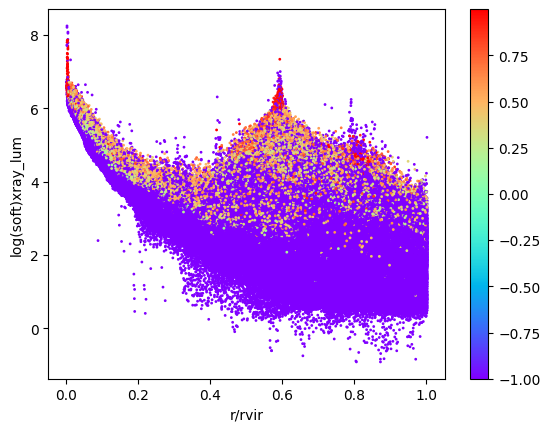

In [11]:
x_g=xyz_g[0]/r
y_g=xyz_g[1]/r
z_g=xyz_g[2]/r
r_g=np.sqrt(x_g**2+y_g**2+z_g**2)
import matplotlib.pyplot as plt
from matplotlib import colors
title="M>1e14"
boxused="/Flamingo/L0200N0720/"
#  x=np.append(x_dm[i],x_g[i])
#  y=np.append(y_dm[i],y_g[i])
fig = plt.figure()
ax=plt.subplot(1,1,1)
B=xray_lum
sc=ax.scatter(r_g,np.log10(B),c=a_agn,s=1,alpha=1,cmap='rainbow')
#ax.scatter(r_g[xray_lum==0],np.log10(T[xray_lum==0]),c='black',s=0.1,alpha=0.1)
plt.colorbar(sc)
#ax.plot(np.sqrt(x**2+y**2),np.log10(0.1),marker='o')
ax.set_xlabel("r/rvir")
ax.set_ylabel("log(soft)xray_lum")

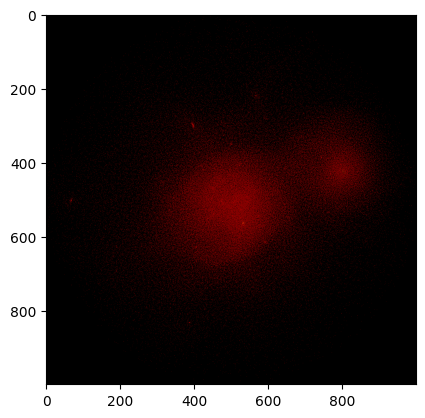

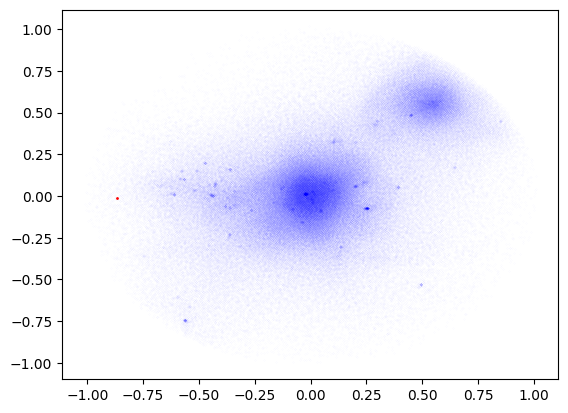

In [71]:

plt.imshow(imgg)
fig = plt.figure()
ax=plt.subplot(1,1,1)
ax.scatter(rotated_points[:,0],rotated_points[:,1],color='b',s=0.0001)
#print(len(x_g[np.log10(T)<5]))
ax.scatter(x,y,color='r',s=1)

[[-0.34562425 -0.45838824]
 [-0.2148519  -0.26641752]
 [-0.05439937  0.02488768]
 ...
 [-0.17204071 -0.05903672]
 [-0.17482951 -0.10934888]
 [-0.07659957 -0.06242512]]
100


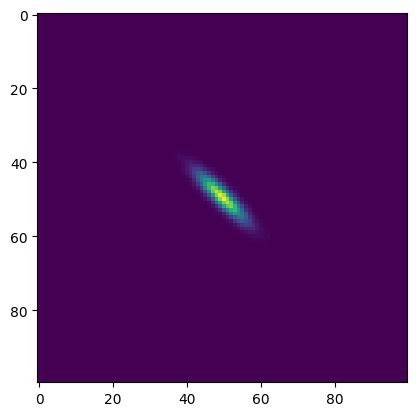

In [8]:
from scipy.ndimage import gaussian_filter
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
num_samples = 10000
random_numbers = np.random.normal(0, 1, (300**2, 2))
img_smooth = gaussian_filter(random_numbers, sigma=1,mode='constant',truncate=3.0)
print(img_smooth)
fig, ax = plt.subplots()

h=np.histogramdd(img_smooth,bins=100,range=[[-3,3],[-3,3]])


print(len(h[0]))
#folder = "/home/jyang/plot/Flamingo/L0200N0720/halo_2d_lum_rotate/66_kde0/"
#img = Image.open(folder+" 0.7208, 0.9334, 0.9379 .png")#.convert("L")
#img_array = np.array(img)
array=h[0]

#img_smooth = gaussian_filter(array, sigma=0.1,mode='constant',truncate=3.0)
max2=np.unravel_index(np.argmax(img_smooth ), img_smooth.shape)

plt.imshow(array)
#plt.imshow(img_smooth)

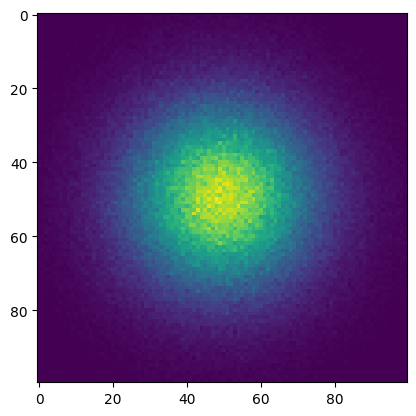

In [13]:
plt.imshow(img_smooth[49])

In [4]:
hist=np.histogramdd(Coord_g/r,bins=200,range=[[-1,1],[-1,1],[-1,1]],weights=xray_lum)
#img2=np.sum(hist[0],axis=0)
#hist=[]
#img1=np.sum(hist[0],axis=0)
#img_smooth = gaussian_filter(hist[0], sigma=2,mode='constant',truncate=3.0)


In [82]:

img_smooth = gaussian_filter(img2,sigma=1,mode='constant',truncate=2.0)
img_smooth=np.log10(img_smooth)
plt.imshow(np.log10(img2))

NameError: name 'img2' is not defined

101


/tmp/ipykernel_2381478/3506977509.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img1))


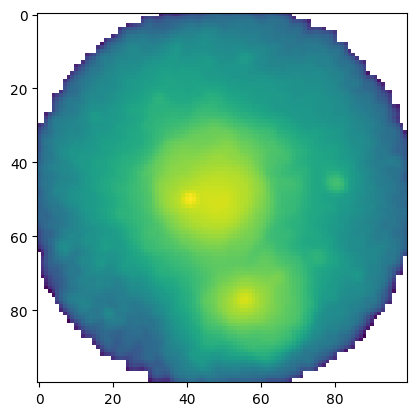

In [58]:
img_smooth = gaussian_filter(hist[0],sigma=1,mode='constant',truncate=2.0)
print(len(hist[1][0]))
img1=np.sum(img_smooth,axis=0)
plt.imshow(np.log10(img1))

/tmp/ipykernel_2896164/1458245082.py:19: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(ra,np.log10(density),color='r',s=0.1)


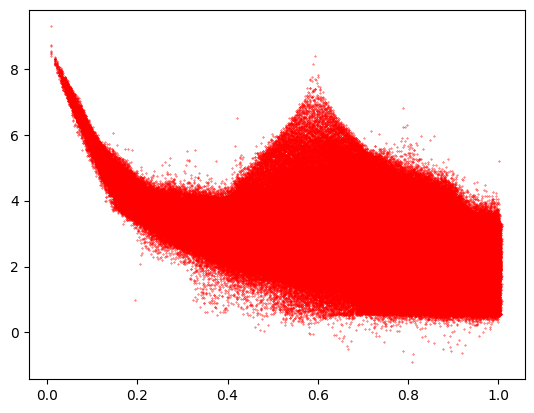

In [5]:
#make scatter plot of xraylum and r with the 3d hist and the smoothed 3d hist
density=hist[0]

edge=hist[1]

n=200
ra=np.zeros(shape=(n,n,n))
for i in range(0,n):
    for j in range(0,n):
        for k in range(0,n):
            ra[i][j][k]=np.sqrt(((edge[0][i]+edge[0][i+1])/2)**2+
            ((edge[1][j]+edge[1][j+1])/2)**2+((edge[2][k]+edge[2][k+1])/2)**2)
#density=density[ra<1]

#ra=ra[ra<1]
fig = plt.figure()
ax=plt.subplot(1,1,1)

ax.scatter(ra,np.log10(density),color='r',s=0.1)


/tmp/ipykernel_2896164/3031222617.py:8: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(ra[ra<1],np.log10(img_smooth[ra<1]),color='r',s=0.1,alpha=1)


[0.00866025]


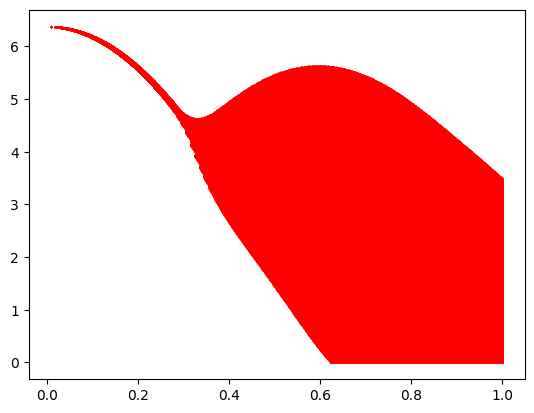

In [10]:
from scipy.ndimage import gaussian_filter
img_smooth = gaussian_filter(density,sigma=10,mode='constant',truncate=3.0)
img_smooth[img_smooth<10**0]=0

fig = plt.figure()
ax=plt.subplot(1,1,1)

ax.scatter(ra[ra<1],np.log10(img_smooth[ra<1]),color='r',s=0.1,alpha=1)
print(ra[img_smooth==np.max(img_smooth)])
#img=np.sum(img_smooth,axis=0)

#plt.imshow(np.log10(img))